<a href="https://colab.research.google.com/github/hfelizzola/Curso-Ciencia-Datos-Ecopetrol/blob/main/Modelos_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Técnicas Predictivas y Descriptivas para la Generación de Nuevo Conocimiento

Este cuaderno contiene el código para la implementación de casos de modelos de machine learning para el curso de ciencia de datos.

In [ ]:
# Cargar modulos para ciencia de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

## 1. Regresión Lineal

In [ ]:
# Cargar modulos para modelo de regresión
import statsmodels.api as sm

### Caso Regresión: Efecto de Gasto Publicitario.

Supongamos que somos consultores estadísticos contratados por un cliente para investigar la asociación entre el gasto en publicidad y las ventas de un producto en particular. Nuestro cliente no puede incrementar directamente las ventas del producto pero puede controlar el gasto publicitario. 

Por lo tanto, si determinamos que existe una asociación entre publicidad y ventas, entonces podemos instruir a nuestro cliente para que ajuste los presupuestos publicitarios. En otras palabras, *nuestro objetivo es desarrollar un modelo preciso que se pueda utilizar para predecir las ventas sobre la base de los tres presupuestos de medios (TV, radio y periódico)*.



In [ ]:
# Cargar datos
publicidad = pd.read_csv('https://raw.githubusercontent.com/hfelizzola/Curso-Ciencia-Datos-Ecopetrol/main/publicidad.csv')
publicidad.head()

,tv,radio,periodico,zona,ventas
0,230.1,37.8,69.2,occidente,22.1
1,44.5,39.3,45.1,oriente,10.4
2,17.2,45.9,69.3,occidente,9.3
3,151.5,41.3,58.5,occidente,18.5
4,180.8,10.8,58.4,oriente,12.9


### Análisis Exploratorio de Datos

En primer lugar se hace un resumen estadístico de cada una de las variables:

In [ ]:
# Resumen estadístico para variables numericas
publicidad.describe()

,tv,radio,periodico,ventas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


El resumen estadístico se puede acompañar de gráficos para revisar la distribución y correlación entre variables.

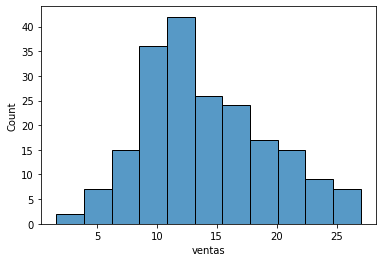

In [ ]:
# Histograma para las ventas
sns.histplot(data=publicidad, x='ventas')

In [ ]:
# Histograma para el gasto en tv. Escriba el código a continuación


In [ ]:
# Histograma para el gasto en radio. Escriba el código a continuación


In [ ]:
# Histograma para el gasto en periodico. Escriba el código a continuación


Para variables categoricas se generan tablas de frecuencia.

In [ ]:
# Tabla de frecuencia para zona
publicidad['zona'].value_counts()

sur          52
oriente      50
norte        50
occidente    48
Name: zona, dtype: int64

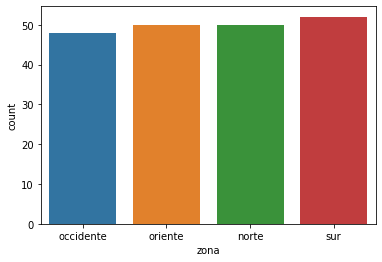

In [ ]:
# Gráfico de Barra
sns.countplot(data=publicidad, x='zona')

Dado que se quiere analizar la relación entre el gasto en publicidad y las ventas. Es recomendable hacer un análisis de la relación entre el gasto en publicidad para cada rubro y las ventas. Para esto podemos utilizar los gráficos de *dispersión*.

En el eje $X$ ubique la variable dependiente (gasto) y en el eje $Y$ la variable dependiente.

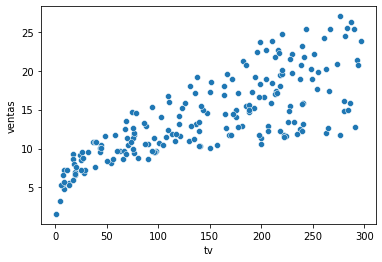

In [ ]:
# Gráfico de dispersión gasto tv vs ventas
sns.scatterplot(data=publicidad, x='tv', y='ventas')

In [ ]:
# Gráfico de dispersión gasto radio vs ventas


In [ ]:
# Gráfico de dispersión gasto periodico vs ventas


Cuando se tiene una variable categorica y una variable numerica se pueden utilizar los gráficos de caja para estudiar la relación entre las dos variables.



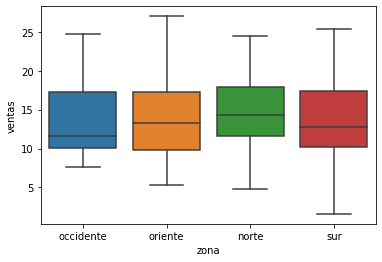

In [ ]:
# Gráfico de caja zona vs ventas
sns.boxplot(data=publicidad, x='zona', y='ventas')

A contiuación, escriba las 5 principales conclusiones del análisis exploratorio:

- 
-
-
-
-

### Modelo de Regresión

En primer lugar se dividen los datos en variables independientes y variable dependiente.

In [ ]:
# Variable dependiente
Y = publicidad['ventas']
# Variables independientes
X = publicidad[['tv','radio','periodico','zona']]

Dado que tenemos una variable categorica, primero tenemos que crear una variable dummy.

In [ ]:
# Crear variables dummies
# drop_first=True retira una de las categorias. Esto es necesario para construir 
# un modelo de regresión
X = pd.get_dummies(X, drop_first=True)
X

,tv,radio,periodico,zona_occidente,zona_oriente,zona_sur
0,230.1,37.8,69.2,1,0,0
1,44.5,39.3,45.1,0,1,0
2,17.2,45.9,69.3,1,0,0
3,151.5,41.3,58.5,1,0,0
4,180.8,10.8,58.4,0,1,0
...,...,...,...,...,...,...
195,38.2,3.7,13.8,0,0,0
196,94.2,4.9,8.1,0,0,1
197,177.0,9.3,6.4,0,1,0
198,283.6,42.0,66.2,0,1,0


In [ ]:
# Agregar la constante al modelo
X = sm.add_constant(X)

# Crear el modelo y ajustarlo
modelo_regresion = sm.OLS(Y, X).fit()

# Generar un resumen del modelo
print(modelo_regresion.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     289.6
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           1.18e-93
Time:                        02:54:12   Log-Likelihood:                -383.39
No. Observations:                 200   AIC:                             780.8
Df Residuals:                     193   BIC:                             803.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.0974      0.370      8.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Análisis de las predicciones

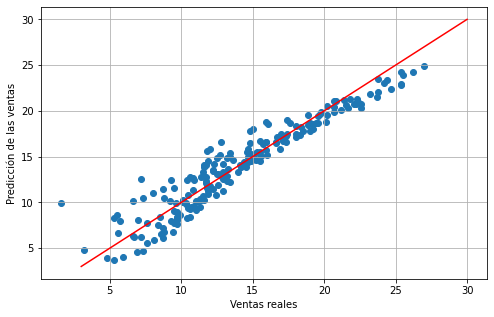

In [ ]:
fig = plt.figure(figsize=(8,5))
plt.scatter(Y, modelo_regresion.predict())
plt.plot([3,30],[3,30], color='red')
plt.xlabel(r'Ventas reales')
plt.ylabel(r'Predicción de las ventas')
plt.grid()
plt.show()

In [ ]:
# Calcular MSE
mse = np.mean((Y - modelo_regresion.predict())**2)

# Calcular RMSE
rmse = np.sqrt(mse)

# Calcular coeficiente de variación
cv = rmse/np.mean(Y)

# Imprimir resultados
print("El MSE = {:.2f}".format(mse))
print("El RMSE = {:.2f}".format(rmse))
print("El CV = {:.2f}".format(cv))

El MSE = 2.71
El RMSE = 1.65
El CV = 0.12


## Regresión Logística

### Caso Clasificación: Riesgo de Default

**Contexto:** Este conjunto de datos contiene información de sobre incumplimientos de pagos en creditos, y entrega información de los clientes de acuerdo a factores demográficos, datos crediticios, historial de pagos y estados de cuenta de tarjetas de crédito. 

**Objetivo:** Entrenar un clasificador que permita estimar el riesgo de defult de un cliente.

In [ ]:
default = pd.read_csv('https://raw.githubusercontent.com/hfelizzola/Curso-Ciencia-Datos-Ecopetrol/main/credit_card_default.csv')
default['default'] = np.int32(default['default'] == 2)
default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_length     1000 non-null   object
 7   installment_rate      1000 non-null   int64 
 8   personal_status       1000 non-null   object
 9   other_debtors         1000 non-null   object
 10  residence_history     1000 non-null   int64 
 11  property              1000 non-null   object
 12  age                   1000 non-null   int64 
 13  installment_plan      1000 non-null   object
 14  housing               1000 non-null   object
 15  existing_credits      1000 non-null   i

In [ ]:
default.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,job,dependents,telephone,foreign_worker,default
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,4,real estate,67,none,own,2,skilled employee,1,yes,yes,0
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,2,real estate,22,none,own,1,skilled employee,1,none,yes,1
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,0
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,4,building society savings,45,none,for free,1,skilled employee,2,none,yes,0
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,4,unknown/none,53,none,for free,2,skilled employee,2,none,yes,1


Para modelos de clasifación vamos a introducir la libreria **sklearn**, la cual nos entrega una serie de modulos y funciones para entrenar, calibrar, validar y analizar modelos de machine learning.

In [ ]:
# Función Crear una regresión logistica
from sklearn.linear_model import LogisticRegression

# Función para dividir los datos en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Funciones para generar una matriz de confusión y reporte con métricas para clasificadores
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from yellowbrick.model_selection import feature_importances

In [ ]:
# Se deviden los datos en variables independientes Xs y variable dependiente y
y = default['default']
x = default.drop(columns=['default'])

In [ ]:
# Se crean las variables dummies
x = pd.get_dummies(x)

In [ ]:
# Dividir los datos en cojunto de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=7)

In [ ]:
# Entrenar el modelo de regresión
regresion_logistica = LogisticRegression(max_iter=1000)
regresion_logistica.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Generar predicciones
y_pred = regresion_logistica.predict(x_test)

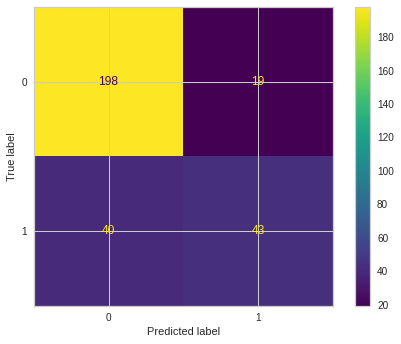

In [ ]:
# Generar matriz de confusión para conjunto de prueba
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       217
           1       0.69      0.52      0.59        83

    accuracy                           0.80       300
   macro avg       0.76      0.72      0.73       300
weighted avg       0.79      0.80      0.79       300



/usr/local/lib/python3.7/dist-packages/yellowbrick/model_selection/importances.py:199: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


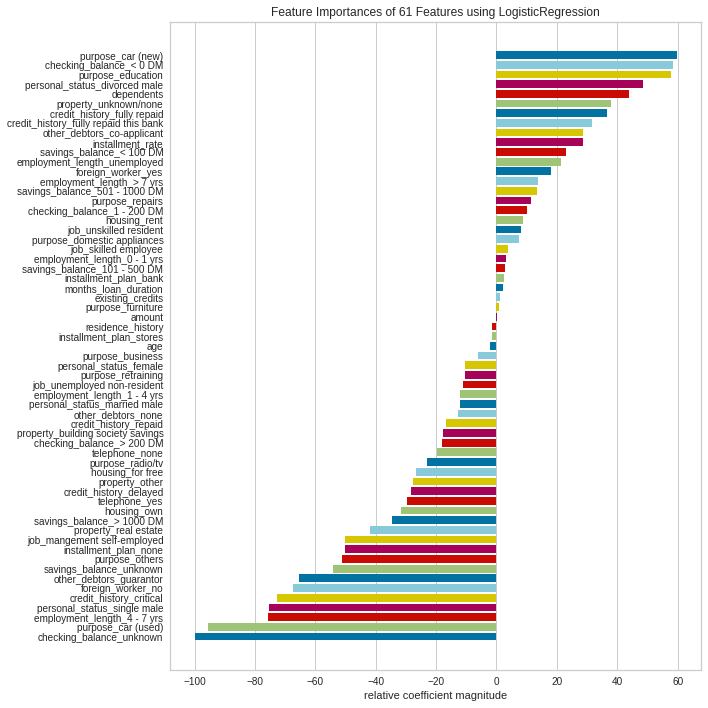

FeatureImportances(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f93298c6190>,
                   estimator=LogisticRegression(max_iter=1000))

In [ ]:
plt.figure(figsize=(10,10))
feature_importances(LogisticRegression(max_iter=1000), x_train, y_train)

## Arboles de Decisión

In [ ]:
# Modulo para arboles de clasificación
from sklearn.tree import DecisionTreeClassifier

# Modulos para calibrar parametros en un arbol
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import KFold

# Modulos para visualizar los arboles
from sklearn.tree import plot_tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

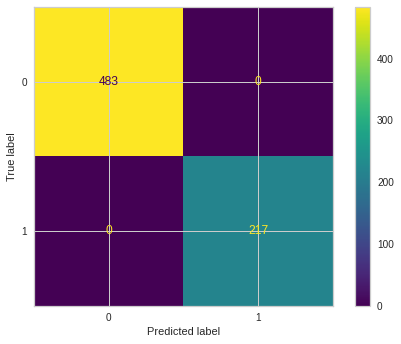

In [ ]:
# Desempeño con datos de entrenamiento
y_pred_train = dt_model.predict(x_train)
cm = confusion_matrix(y_train, y_pred_train)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       483
           1       1.00      1.00      1.00       217

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



Parece que tenemos un desempeño perfecto. Pero esto es engañozo.

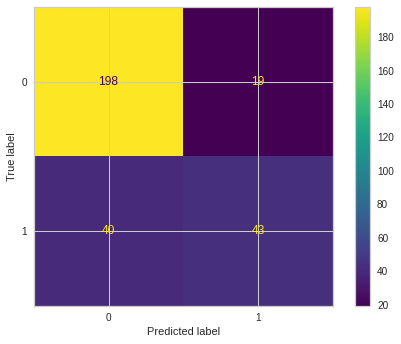

In [ ]:
# Desempeño con datos de prueba
y_pred_test = dt_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       217
           1       0.57      0.58      0.57        83

    accuracy                           0.76       300
   macro avg       0.70      0.71      0.71       300
weighted avg       0.76      0.76      0.76       300



Con el conjunto de prueba el desempeño es mucho menor. Recuerde que este problema se denomina sobreajuste (**overfitting**). El modelo se ajusta bien a los datos de entrenamiento, pero no funciona bien al predecir nuevas observaciones.

Por esta razon, es importante calibrar el parámetro de profundidad del arbol **max_depth** para evitar este problema. A continuación, un gráfica que nos ayuda al encontrar el valor para este parámetro que permite evitar el sobre ajuste.

Dado que no interesa detectar con efectividad los clientes que van a entrar en default, lo mejor es utilizar la métrica de sensibilidad o **recall** `(scoring="recall")`. Vamos a probar un rango de profundida que va entre 2 y 20 `(param_name="max_depth",param_range=np.arange(2, 21))`. Además, vamos a utilizar el metodo de validación cruzada con 5 folds `(cv=5)`.

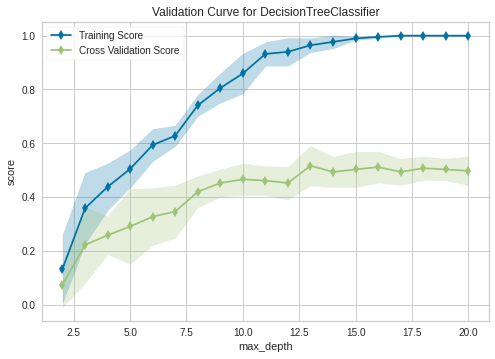

In [ ]:
curva_calibracion = ValidationCurve(
    DecisionTreeClassifier(), 
    param_name="max_depth",
    param_range=np.arange(2, 21), 
    cv=5, 
    scoring="recall"
)

# Fit and show the visualizer
curva_calibracion.fit(x_train, y_train)
curva_calibracion.show()

Observamos que despues de max_depth = 10, el desempeño del conjunto de prueba se estabiliza, por tanto este puede ser un buen valor para el max_depth. Sin embargo, la separación entre las dos curvas denota otro problema y puede que los datos son insuficientes. Esto se puede confirmar con la curva de aprendizaje. En esta gráfica se puede observar que con el tamaño de los datos a un las curvas siguen un separación considerable, lo que muestra que la diferencia en el desempeño de los conjuntos es alto. Esto es algo que se podría resolver con un conjunto mas grande, aunque no es una garantia. 

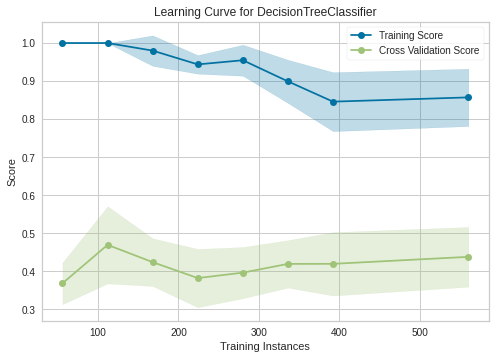

In [ ]:
# Curva de aprendizaje
curva_aprendizaje = LearningCurve(
    DecisionTreeClassifier(max_depth=10), 
    cv=5, 
    scoring='recall', 
    train_sizes=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,1], 
    n_jobs=4
)
curva_aprendizaje.fit(x_train, y_train)       
curva_aprendizaje.show() 

Habiendo calibrado el parametro max_depth en 10. Se procede a entrenar el modelo y evaluar.

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=10)
dt_model.fit(x_train, y_train)
y_pred_train = dt_model.predict(x_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       483
           1       0.94      0.86      0.90       217

    accuracy                           0.94       700
   macro avg       0.94      0.92      0.93       700
weighted avg       0.94      0.94      0.94       700



In [ ]:
y_pred_test = dt_model.predict(x_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       217
           1       0.58      0.53      0.55        83

    accuracy                           0.76       300
   macro avg       0.70      0.69      0.70       300
weighted avg       0.76      0.76      0.76       300



In [ ]:
dt_final_model = dt_model = DecisionTreeClassifier(max_depth=10)
dt_final_model.fit(x, y)

DecisionTreeClassifier(max_depth=10)

In [ ]:
#
from sklearn.tree import export_text
text_representation = export_text(dt_final_model)
print(text_representation)

|--- feature_10 <= 0.50
|   |--- feature_0 <= 22.50
|   |   |--- feature_14 <= 0.50
|   |   |   |--- feature_0 <= 11.50
|   |   |   |   |--- feature_1 <= 10931.50
|   |   |   |   |   |--- feature_4 <= 34.50
|   |   |   |   |   |   |--- feature_20 <= 0.50
|   |   |   |   |   |   |   |--- feature_0 <= 7.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  7.50
|   |   |   |   |   |   |   |   |--- feature_45 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 9.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_0 >  9.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_45 >  0.50
|   |   |   |   |   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_9 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feat

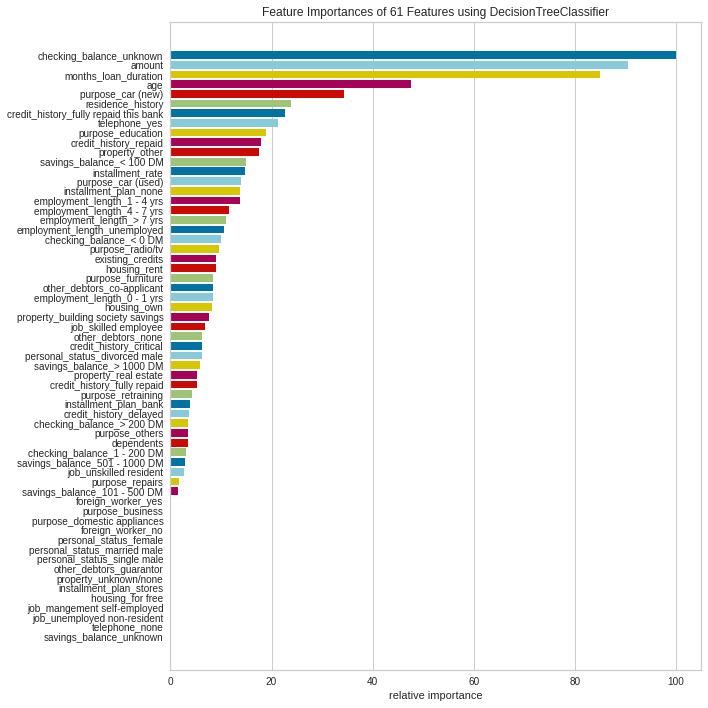

FeatureImportances(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f93252c1f90>,
                   estimator=DecisionTreeClassifier(max_depth=10))

In [ ]:
plt.figure(figsize=(10,10))
feature_importances(DecisionTreeClassifier(max_depth=10), x, y)

## Reducción de Dimensiones y Análisis de Cluster

### Caso Aprendizaje no Supervisado: Clientes mayoristas

**Contexto**: El conjunto de datos se refiere a clientes de un distribuidor mayorista. Incluye el gasto anual en unidades monetarias (u.m.) en diversas categorías de productos:

1. FRESCO: gasto anual (u.m.) en productos frescos (Continuo);
2. LECHE: gasto anual (u.m.) en productos lácteos (Continuo);
3. SUPERMERCADOS: gasto anual (u.m.) en productos de abarrotes (Continuo);
4. CONGELADOS: gasto anual (u.m.) en productos congelados (Continuo)
5. DETERGENTES_PAPEL: gasto anual (u.m.) en detergentes y productos de papel (Continuo)
6. DELICATESSEN: gasto anual (m.u.) en productos y charcutería (Continuo);

Además, se tiene información sobre:
- CANAL: Canal de clientes - Horeca (Hotel/Restaurante/Cafetería) o Canal
Retail (Nominal)
- REGIÓN: Región del cliente – Lisnon, Oporto u otra (Nominal)

**Objetivo**: segmentar los clientes a partir de los patrones compras.

In [ ]:
# Cargar datos
compras = pd.read_csv('https://raw.githubusercontent.com/hfelizzola/Curso-Ciencia-Datos-Ecopetrol/main/wholesale_customers_data.csv')
compras

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [ ]:
# Cargar librerias
from sklearn.cluster import KMeans
from yellowbrick.features import PCA
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
# Dividir los datos
ys = compras[['Channel']]
xs = compras.drop(columns=['Channel'])

### Análisis de Cluster

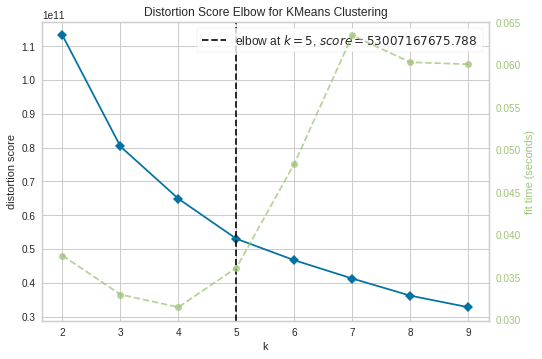

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(xs)        # Fit the data to the visualizer
visualizer.show() 

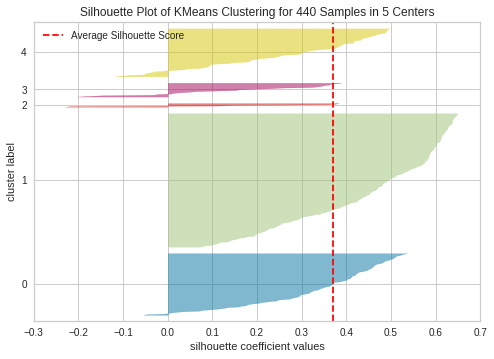

In [ ]:
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(xs)        # Fit the data to the visualizer
visualizer.show()   

### Reducción de dimensiones con PCA

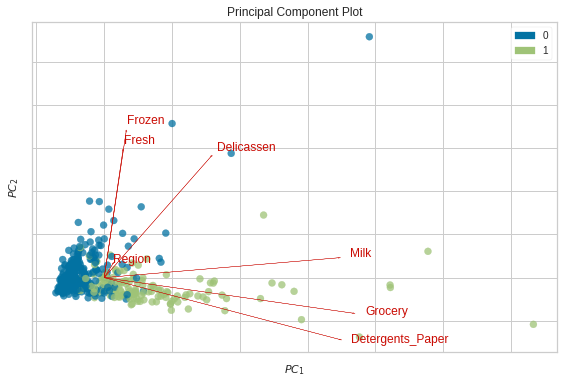

In [ ]:
label_encoder = LabelEncoder().fit(ys['Channel'])
y = label_encoder.transform(ys['Channel'])
visualizer = PCA(scale=True, proj_features=True)
visualizer.fit_transform(xs,y)
visualizer.show()

### Análisis de Cluster + PCA

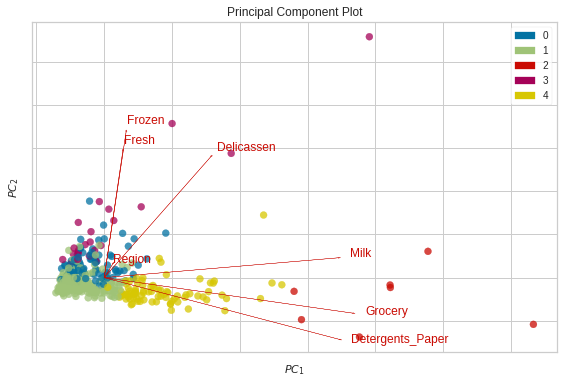

In [ ]:
cluster_encoder = LabelEncoder().fit(model.labels_)
y_cluster = cluster_encoder.transform(model.labels_)
visualizer = PCA(scale=True, proj_features=True)
visualizer.fit_transform(xs,y_cluster)
visualizer.show()

## Reglas de Asociación

In [ ]:
# https://www.kaggle.com/code/mervetorkan/association-rules-with-python/notebook
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
canasta = pd.read_csv('https://raw.githubusercontent.com/hfelizzola/Curso-Ciencia-Datos-Ecopetrol/main/GroceryStoreDataSet.csv',
                      names = ['products'], 
                      sep = ',')
canasta


,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


In [ ]:
canasta = list(canasta["products"].apply(lambda x:x.split(",") ))
canasta

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [ ]:
a = TransactionEncoder()
a_data = a.fit(canasta).transform(canasta)
df = pd.DataFrame(a_data,columns=a.columns_)
df = df.replace({False:0,True:1})
df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,1,0,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,1,1,1,0,0
4,1,0,0,0,0,0,0,1,0,0,1
5,0,1,1,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,1,0,0,1
7,1,0,1,0,0,0,0,1,0,0,1
8,0,0,1,0,0,0,1,1,0,0,1
9,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
df = apriori(df, min_support = 0.2, use_colnames = True)
df

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.40,(COFFEE)
4,0.30,(CORNFLAKES)
5,0.25,(MAGGI)
6,0.25,(MILK)
7,0.30,(SUGER)
8,0.35,(TEA)
9,0.20,"(BISCUIT, BREAD)"


In [ ]:
df_ar = association_rules(df, metric = "confidence", min_threshold = 0.6)
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(MILK),(BREAD),0.25,0.65,0.2,0.800000,1.230769,0.0375,1.75
1,(SUGER),(BREAD),0.30,0.65,0.2,0.666667,1.025641,0.0050,1.05
2,(CORNFLAKES),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80
3,(SUGER),(COFFEE),0.30,0.40,0.2,0.666667,1.666667,0.0800,1.80
4,(MAGGI),(TEA),0.25,0.35,0.2,0.800000,2.285714,0.1125,3.25
